### p73 선형 회귀 모델
- 데이터를 선형 함수로 모델링
- 최소제곱법 : 평균제곱오차를 최소화하는 파라미터를 찾는다
  - 파라미터를 줄이고 키우고를 반복한다(예시)
  - 오차를 파라미터로 미분한 값만큼 조절을 반복한다(경사하강법)
  - 정규방정식으로 찾기(데이터가 많아지면 메모리 부족으로 사용 불가)
- 평균제곱오차 : 오차(예측과 정답의 차이)를 제곱 > 모든 샘플들의 오차를 평균

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 키와 몸무게, 몸무게로부터 키를 예측해보자
몸무게 = [30,60,70,90]
키 = [120,160, 170, 190]
몸무게_test = [65, 80] # 이 두사람의 키는 어떻게 될까?

In [10]:
# 4행 1열(ok) / 1행 4열(wrong)
몸무게 = np.array(몸무게).reshape((-1,1))
키 = np.array(키)
몸무게_test = np.array(몸무게_test).reshape((-1,1))

In [11]:
#76 모델 선택
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=몸무게, y=키) # Y = w*x+b 에서 w와 b를 조절하는 것

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
몸무게_test, lr.predict(몸무게_test)

(array([[65],
        [80]]), array([162.93333333, 180.53333333]))

In [14]:
lr.score(몸무게, 키) # 결정계수 max 1

0.9928205128205129

In [16]:
#계수 w 와 절편 b ,  Y = wx + b = 1.17 * x + 86.6
lr.coef_, lr.intercept_

(array([1.17333333]), 86.66666666666667)

In [17]:
lr.coef_ * 몸무게 + lr.intercept_ # Y = w * x + b

array([[121.86666667],
       [157.06666667],
       [168.8       ],
       [192.26666667]])

In [18]:
키

array([120, 160, 170, 190])

## LinearRegression 으로  내일의 종가 예측
- 입력(X:하루 전 데이터), 출력(Y:다음 날의 종가)
- 데이터 총 m = 10, 학습용 8, 테스트 2
- 정규화는 일단 생략

In [71]:
url='https://finance.daum.net/domestic/kospi200'
url='코스피200 _ 다음 금융.html'#웹페이지를 다른 이름으로 저장
tables = pd.read_html(url, index_col=0)
len(tables)

3

In [75]:
df = tables[1]

In [76]:
#전처리 : 전일비와 등락률을 수치데이터로 변환
df['전일비'] = df['전일비'].replace('▼','-',regex=True)
df['전일비'] = df['전일비'].replace('▲','',regex=True)
df['등락률'] = df['등락률'].replace('%','',regex=True)
df['전일비'] = df['전일비'].astype(np.float)
df['등락률'] = df['등락률'].astype(np.float)

In [96]:
#min max 정규화 [0,1]
minimum = np.min(df, axis=0)
maximum = np.max(df, axis=0)
df_norm = (df - minimum) / (maximum-minimum)

In [97]:
# X 와 y 를 분리
X = df_norm.iloc[1:]#오늘 데이터 제외
y = df_norm.iloc[:-1, 0]#가장 오래된 데이터와 종가 외의 컬럼 제외
X.shape, y.shape

((9, 8), (9,))

In [98]:
#Train / Test 용 분리
offset = 2
X_train = X[offset:]#예전
X_test = X[:offset]#최근
y_train = y[offset:]#예전
y_test = y[:offset]#최근

In [134]:
'''
train 셋으로 Linear Regression 모델 fit
78 릿지(ridge)모델 : w 를 가능한한 작게 만드는 LinearRegression
   규제(regularization) - Lasso : L1(abs), Ridge: L2(square)
   라쏘 : 몇가지 특징만 사용해서 Y 를 예측하고 싶을 때
W 를 줄인다는 것은 Y를 예측하는 데 가능한한 모든 특성을 반영해라
Y = w1 * x1 + w2 * x2 + ..... wi*xi + b
'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = Lasso(alpha=1.0).fit(X_train, y_train)

In [135]:
#score 측정, LR -2만점, Ridge -14점
#Linear regression : train 굿, 테스트 bad : 과적합 Overfitting
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.0, -47.86380674719839)

In [136]:
np.sum(lr.coef_)

0.0

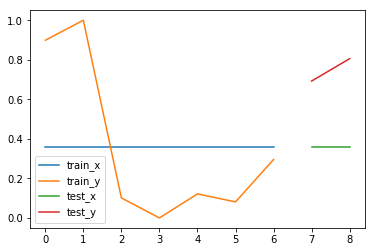

In [137]:
#예측을 그래프로 시각화
train_len = np.arange(len(X_train))
test_len = np.arange(len(X_train), len(X_train) + len(X_test))
plt.plot(train_len, lr.predict(X_train), label='train_x')
plt.plot(train_len, y_train, label='train_y')
plt.plot(test_len, lr.predict(X_test), label='test_x')
plt.plot(test_len, y_test, label='test_y')
plt.legend()

In [147]:
f = '_기간별평균환율조회(월별)_20190702.xls' #csv 로 새로 저장하세요
f = 'japan_money.csv'
df = pd.read_csv(f, encoding='cp949', index_col=0, header=1)
df.shape

(494, 8)

데이터 정제(refinement) 

In [156]:
df4 = df.iloc[:, :4]
df4 = df4.dropna()# NaN 하나라도 있으면 그 행을 버린다

전처리 (문자 > 숫자) preprocessing

In [165]:
df4 = df4.replace(',','',regex=True) 
df4 = df4.astype(np.float)

In [170]:
df4.iloc[0], df4.iloc[-1]

(보내실때    1087.53
 받으실때    1066.65
 사실때     1095.93
 파실때     1058.25
 Name: 2019.07.02, dtype: float64, 보내실때    1015.36
 받으실때     995.86
 사실때     1023.20
 파실때      988.02
 Name: 2018.06.29, dtype: float64)

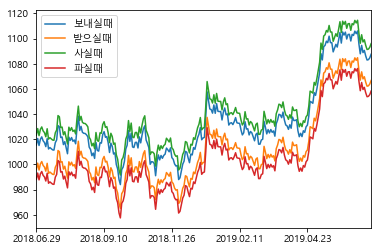

In [168]:
plt.rc('font', family='Malgun Gothic')
df4.iloc[::-1].plot()

In [174]:
f='8.8.1.1 주요국통화의 대원화 환 (1).xls'
df = pd.read_excel(f, encoding='cp949', index_col=0, header=3)
df.shape

(369, 2)

In [183]:
df.columns = ['미국달러', '일본엔']
df2 = df.dropna()

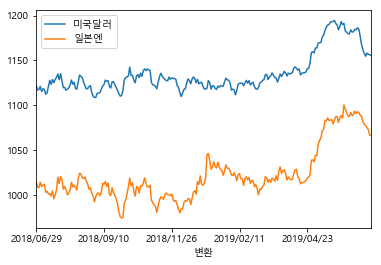

In [182]:
df2.plot()

In [191]:
window_weak = 4
window_day = window_weak * 5 # 5 일
predict_day = 5
window_day

20

#### X, Y 생성 갯수 체크
- 데이터가 30개 있으면? 20개로부터 5일 예측하므로 (20+5) = 1샘플, 총 5샘플
- 현재 데이터 248개 샘플, 총 224 쌍의 X, Y 를 만들어야 합니다
- X[224, 2 * 20], y[224, 2 * 5]

In [211]:
before = df2.iloc[:-predict_day] #최근 데이터 5개 빼고
later = df2.iloc[window_day:] #과거 데이터 20개 빼고
before.shape, later.shape

((243, 2), (228, 2))

In [213]:
m = len(df2) - (predict_day + window_day - 1)
m

224

In [221]:
x_list = []
y_list = []
for i in range(m):
    x = df2.iloc[i:i+window_day]#20일간의 데이터
    y = df2.iloc[i+window_day:i+window_day+predict_day] #그다음 5일간의 데이터
    x_list.append(x.values)#날짜 인덱스 빼고 값만 저장
    y_list.append(y.values)

In [223]:
X = np.array(x_list)
y = np.array(y_list)
X.shape, y.shape #(m-instance, day, 특징수(달러,엔화))

((224, 20, 2), (224, 5, 2))

In [225]:
#2차원으로 변환
X = np.reshape(X, [m, -1])
y = np.reshape(y, [m, -1])
X.shape, y.shape # (달러,엔화,달러,엔화....)

((224, 40), (224, 10))

In [229]:
# train / test 분리
offset = 30 #테스트셋 
X_train = X[offset:]
X_test = X[:offset]
y_train = y[offset:]
y_test = y[:offset]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 40), (30, 40), (194, 10), (30, 10))

In [231]:
#모델 선택, 학습
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = Ridge(alpha=1.0).fit(X_train, y_train)

In [233]:
#성능 측정
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9205409191491469, -0.6542108232125314)

In [253]:
최근20일데이터 = df2.iloc[-window_day:]
최근20일데이터.shape

(20, 2)

In [255]:
#미래의 5일 환율 예측을 그래프로 시각화
최근20일데이터 = df2.iloc[-window_day:].values.reshape([1, -1])
미래의5일예측 = lr.predict(최근20일데이터)
미래의5일예측 = np.reshape(미래의5일예측, [predict_day, 2])#다시 3차원으로 변환
미래의5일예측.shape

(5, 2)

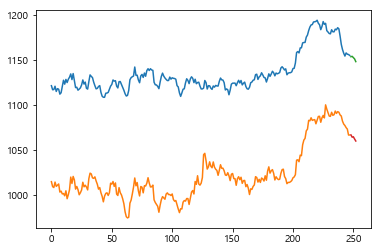

In [260]:
usa = df2.iloc[:,0].values
japan = df2.iloc[:,1].values
x_num = np.arange(len(usa))
x1_num = np.arange(len(usa),len(usa)+len(미래의5일예측))
plt.plot(x_num, usa)
plt.plot(x_num, japan)
plt.plot(x1_num, 미래의5일예측[:,0])
plt.plot(x1_num, 미래의5일예측[:,1])